# 1. Importing libraries

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats
import seaborn as sns
import warnings

# 2. Loading the csv file

In [247]:
movies=pd.read_csv('movies.csv')
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [248]:
movies.shape

(9999, 9)

## Find if there are any missing values

In [249]:
movies.isna().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [250]:
movies.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

In [251]:
movies['Gross'].head(100)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37         NaN
38         NaN
39         NaN
40         NaN
41         NaN
42         NaN
43         NaN
44         NaN
45         NaN
46         NaN
47         NaN
48         NaN
49         NaN
50         NaN
51         NaN
52         NaN
53         NaN
54         NaN
55         NaN
56         NaN
57         NaN
58         NaN
59         NaN
60         NaN
61         NaN
62         NaN
63         NaN
64         NaN
65         NaN
66        

# 3. Check if there are any missing values in the csv file
## Null values should be filled with meaning full values. Null values should not be filled by the values in backward or forward filling method, as the rows are independent of other rows. Null values should be replaced with the mean of all the numerical values of a particular column "Gross" and "Rating".

## Find the length of the string in the column "Gross"

In [183]:
movies['Gross'].str.len()

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9994   NaN
9995   NaN
9996   NaN
9997   NaN
9998   NaN
Name: Gross, Length: 9999, dtype: float64

### Extracting the numerical values from the object data type in the column "Gross". 
### Now creating a new column named as "Gross_new" and add the extracrted values form column "Gross".

In [190]:
import pandas as pd
import re

# Sample data (assuming your column is named 'data_column')
# data = pd.DataFrame({'data_column': ["$89.22M", "$123.45B", np.nan, "56.78K"]})

# Function to extract numeric part (handles NaN and non-numeric values)
def extract_number(text):
  if pd.isna(text):  # Check for NaN
    return None
  pattern = r"(\d+\.\d+)([MKB]?)"  # Capture digits, decimal, and optional unit
  match = re.search(pattern, text)
  if match:
    return float(match.group(1))  # Extract and convert to float
  else:
    return None  # Handle cases where no number is found

# Apply the function with error handling
movies['Gross_new'] = movies['Gross'].apply(extract_number)

# Handle non-numeric values (optional)
movies['Gross_new'] = pd.to_numeric(movies['Gross_new'], errors='coerce')  # Convert to numeric, coerce errors to NaN

# Print the DataFrame
movies.head(100)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Gross_new
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN,NaN


## Now fill the missing values in the column "Gross_new" with mean of the numercial values.

In [191]:
movies['Gross_new'] = movies['Gross_new'].fillna(movies['Gross_new'].mean())
movies.head(100)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Gross_new
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,43.70187
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,43.70187
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,43.70187
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,43.70187
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,43.70187
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN,43.70187
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN,43.70187
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN,43.70187
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN,43.70187
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN,43.70187


## Filling missing values with mean in the column "Rating"

In [192]:
movies['RATING'] = movies['RATING'].fillna(movies['RATING'].mean())
movies.head(100)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Gross_new
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.100000,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,43.70187
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.000000,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,43.70187
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.200000,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,43.70187
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.200000,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,43.70187
4,Army of Thieves,(2021),"\nAction, Crime, Horror",6.921176,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,43.70187
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.600000,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN,43.70187
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.800000,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN,43.70187
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.600000,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN,43.70187
8,Never Have I Ever,(2020– ),\nComedy,7.900000,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN,43.70187
9,Virgin River,(2019– ),"\nDrama, Romance",7.400000,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN,43.70187


# 4. Since column of "ONE-LINE" is unwanted, It shall be dropped.

In [193]:
movies_5=movies.drop("ONE-LINE", axis=1)
movies_5.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross,Gross_new
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.100000,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,43.70187
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.000000,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,43.70187
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.200000,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,43.70187
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.200000,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,43.70187
4,Army of Thieves,(2021),"\nAction, Crime, Horror",6.921176,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,43.70187


# 5. Search duplicate values and then delete them

In [194]:
movies_5.duplicated().sum()

521

In [195]:
movies_6=movies_5.drop_duplicates()
movies_6.duplicated().sum()

0

In [196]:
movies_6.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross,Gross_new
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.100000,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,43.70187
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.000000,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,43.70187
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.200000,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,43.70187
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.200000,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,43.70187
4,Army of Thieves,(2021),"\nAction, Crime, Horror",6.921176,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,43.70187


# 6. Check and remove oultlier in Gross column

<function matplotlib.pyplot.show(close=None, block=None)>

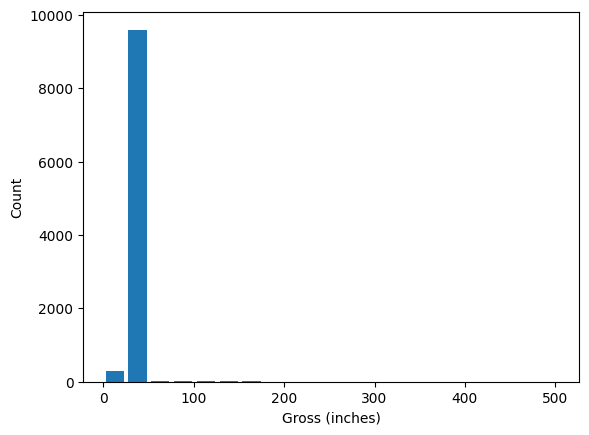

In [197]:
plt.hist(movies.Gross_new, bins=20, rwidth=0.8)
plt. xlabel( 'Gross (inches)')
plt.xticks()
plt. ylabel ('Count' )
plt. show

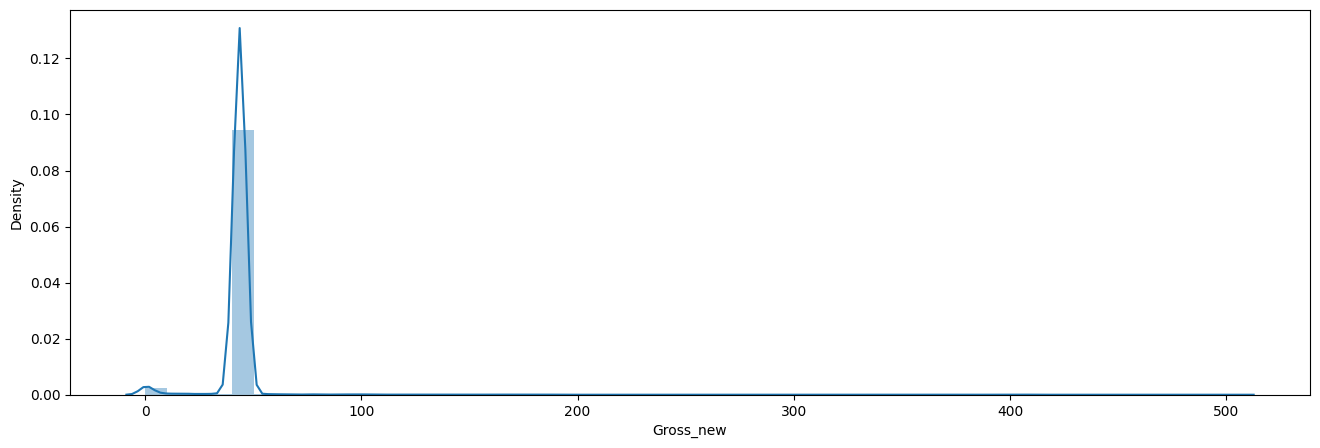

In [257]:
plt.figure(figsize=(16,5))
#plt.subplot(1,2,1)
#sns.distplot(movies_6['VOTES'])
#plt.subplot(1,2,2)
sns.distplot(movies_6['Gross_new'])
plt.show()

## Box plot is used for finding interesting data points and outliers.

<Axes: ylabel='Gross_new'>

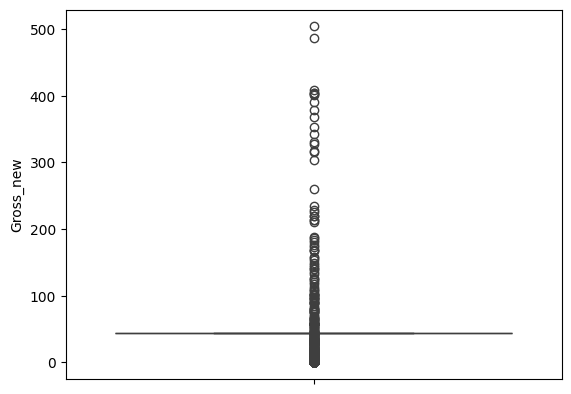

In [199]:
sns.boxplot(movies_6['Gross_new'])

<Axes: >

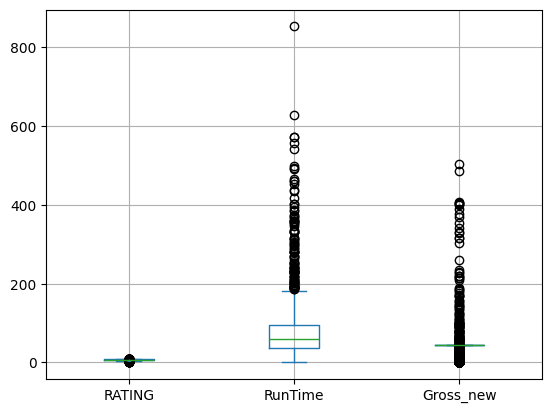

In [243]:
movies_6.plot.box(grid='True')

## Finding Outliers in column "Gross_new"

In [200]:
z = np.abs(stats.zscore(movies_6['Gross_new']))

threshold = 3

outliers = movies_6[z>threshold]
print(outliers)

                                                 MOVIES         YEAR  \
85                                        Jurassic Park       (1993)   
111   The Lord of the Rings: The Fellowship of the Ring       (2001)   
128                                                Jaws       (1975)   
132                                        The Departed       (2006)   
143                                           Gone Girl       (2014)   
144                      Jumanji: Welcome to the Jungle       (2017)   
159                                                 300       (2006)   
161                                                  It   (I) (2017)   
165                           Spider-Man: Far from Home       (2019)   
171                   The Hobbit: An Unexpected Journey       (2012)   
181                                    Fast & Furious 7       (2015)   
193       The Lord of the Rings: The Return of the King       (2003)   
194                                         Baby Driver       (2

## Excluding Outliers from dataframe "movies_6"

In [213]:
movies_7=movies_6[np.abs(stats.zscore(movies_6['Gross_new'])) < 3]
movies_7

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross,Gross_new
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.100000,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,43.70187
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.000000,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,43.70187
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.200000,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,43.70187
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.200000,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,43.70187
4,Army of Thieves,(2021),"\nAction, Crime, Horror",6.921176,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,43.70187
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",6.921176,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN,43.70187
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",6.921176,\n,NaN,NaN,NaN,43.70187
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",6.921176,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN,43.70187
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",6.921176,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN,43.70187


# 7. Maximum rows in dataframe "movies_7"

## Maximum rows in column "Gross_new"

In [202]:
movies_7.shape

(9418, 9)

## Maximum rows is set to 2000 for dataframe "movies_7".

In [280]:
movies_7.head(2000)

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross,Gross_new
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.100000,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,43.70187
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.000000,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,43.70187
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.200000,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,43.70187
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.200000,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,43.70187
4,Army of Thieves,(2021),"\nAction, Crime, Horror",6.921176,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,43.70187
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.600000,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN,43.70187
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.800000,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN,43.70187
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.600000,"\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN,43.70187
8,Never Have I Ever,(2020– ),\nComedy,7.900000,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN,43.70187
9,Virgin River,(2019– ),"\nDrama, Romance",7.400000,\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN,43.70187


# 8. Correlation for two columns names "RATING" and "Gross_new"

In [282]:
print(movies_7['RATING'].corr(movies_7['Gross_new']))

0.047435084641204266


In [297]:
new_movies_7 = movies_7.loc[:, ['RATING', 'Gross_new']]  # Select columns by label (':' for all rows)
print(new_movies_7)

        RATING  Gross_new
0     6.100000   43.70187
1     5.000000   43.70187
2     8.200000   43.70187
3     9.200000   43.70187
4     6.921176   43.70187
...        ...        ...
9993  6.921176   43.70187
9995  6.921176   43.70187
9996  6.921176   43.70187
9997  6.921176   43.70187
9998  6.921176   43.70187

[9418 rows x 2 columns]


In [284]:
corr_matrix = new_movies_7.corr()['Gross_new']['RATING']
print(corr_matrix)

0.04743508464120548


In [293]:
corr = new_movies_7.corr()
corr.style.background_gradient(cmap='coolwarm')

,RATING
RATING,1.000000


## Deleting a column called "Gross_new"

In [299]:
new_movies_7.corr()

,RATING,Gross_new
RATING,1.000000,0.047435
Gross_new,0.047435,1.000000


In [294]:
new_movies_7.corr()

,RATING
RATING,1.0


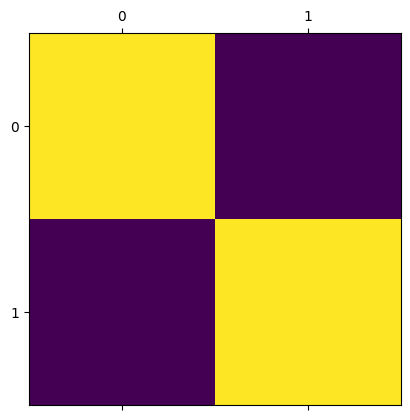

In [303]:
plt.matshow(new_movies_7.corr())
plt.show()

## Using Seaborn Heatmap for outliers detection

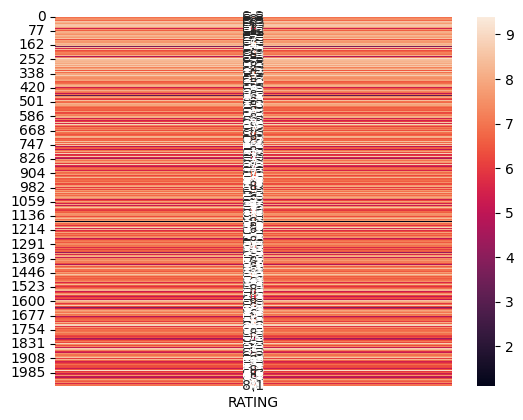

In [289]:
sns.heatmap(new_movies_7.head(2000),annot=True)
plt.show()